# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
import seaborn as sns; sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

# **Gathering Data**

In [3]:
Customers_data = pd.read_excel('/content/Customer.xlsx')

In [4]:
Product_data=pd.read_excel('/content/Product.xlsx')

In [5]:
Sales_data=pd.read_excel('/content/Sales.xlsx')

In [33]:
calender_data=pd.read_excel('/content/Calender.xlsx')

In [6]:
Territory_data=pd.read_excel('/content/Territory.xlsx')

In [7]:
budget_data=pd.read_excel('/content/Budgetdata.xlsx')

In [8]:
print(Customers_data.shape)
print(Product_data.shape)
print(Sales_data.shape)
print(Territory_data.shape)

(18484, 17)
(606, 13)
(58189, 25)
(11, 5)


# **Cleaning Data**

In [34]:
Sales_data.drop(['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 22','diif std cost','diff list price'], axis=1, inplace=True)


In [35]:
Sales_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  StandardCost    

In [36]:
Customers_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerKey           18484 non-null  int64         
 1   FirstName             18484 non-null  object        
 2   LastName              18484 non-null  object        
 3   FullName              18484 non-null  object        
 4   BirthDate             18484 non-null  datetime64[ns]
 5   MaritalStatus         18484 non-null  object        
 6   Gender                18484 non-null  object        
 7   YearlyIncome          18484 non-null  int64         
 8   TotalChildren         18484 non-null  int64         
 9   NumberChildrenAtHome  18484 non-null  int64         
 10  Education             18484 non-null  object        
 11  Occupation            18484 non-null  object        
 12  HouseOwnerFlag        18484 non-null  int64         
 13  NumberCarsOwned 

In [37]:
calender_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1461 non-null   datetime64[ns]
 1   DateKey         1461 non-null   int64         
 2   Year            1461 non-null   int64         
 3   Quarter         1461 non-null   object        
 4   MonthNum        1461 non-null   int64         
 5   Month           1461 non-null   object        
 6   FiscalYear      1461 non-null   object        
 7   FiscalQuarter   1461 non-null   object        
 8   FiscalMonthNum  1461 non-null   int64         
 9   FiscalMonth     1461 non-null   object        
 10  MonthYear       1461 non-null   object        
 11  MonthYearLong   1461 non-null   object        
 12  MonthYearNum    1461 non-null   int64         
 13  WeekdayNum      1461 non-null   int64         
 14  Weekday         1461 non-null   object        
 15  Week

In [38]:
budget_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     17 non-null     object
 1   Subcategory  17 non-null     object
 2   ProductName  17 non-null     object
 3   Jan, 2016    17 non-null     int64 
 4   Feb, 2016    17 non-null     int64 
 5   Mar, 2016    17 non-null     int64 
 6   Apr, 2016    17 non-null     int64 
 7   May, 2016    17 non-null     int64 
 8   Jun, 2016    17 non-null     int64 
 9   Jul, 2016    17 non-null     int64 
 10  Aug, 2016    17 non-null     int64 
 11  Sep, 2016    17 non-null     int64 
 12  Oct, 2016    17 non-null     int64 
 13  Nov, 2016    17 non-null     int64 
 14  Dec, 2016    17 non-null     int64 
dtypes: int64(12), object(3)
memory usage: 2.1+ KB


In [39]:
Customers_data.shape[0]  # shape[0] means total rows
# missingvalue= ((df.isnull().sum()/df.shape[0])*100).round(2)
# missingvalue

18484

In [40]:
missingvalue= ((Customers_data.isnull().sum()/Customers_data.shape[0])*100).round(2)
pd.DataFrame(missingvalue)

,0
CustomerKey,0.00
FirstName,0.00
LastName,0.00
FullName,0.00
BirthDate,0.00
MaritalStatus,0.00
Gender,0.00
YearlyIncome,0.00
TotalChildren,0.00
NumberChildrenAtHome,0.00


<Axes: xlabel='DateFirstPurchase', ylabel='Density'>

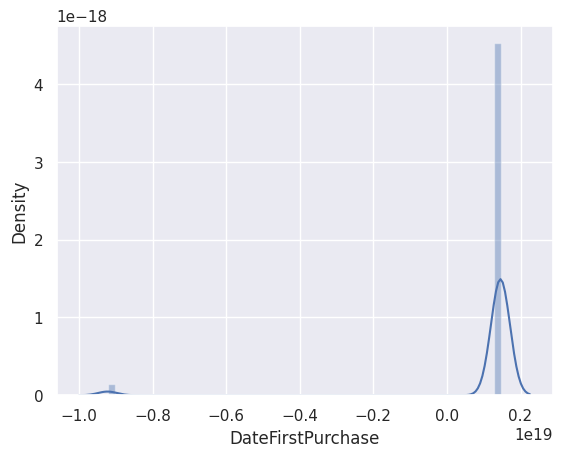

In [41]:
# Distribution plot to identify which Technique to use
sns.distplot(Customers_data['DateFirstPurchase'])

In [42]:
# Fillna method using Median
col = Customers_data['DateFirstPurchase']
col= col.fillna(col.median(),inplace=True)

In [43]:
# After fillna method
Customers_data.isnull().sum()

CustomerKey             0
FirstName               0
LastName                0
FullName                0
BirthDate               0
MaritalStatus           0
Gender                  0
YearlyIncome            0
TotalChildren           0
NumberChildrenAtHome    0
Education               0
Occupation              0
HouseOwnerFlag          0
NumberCarsOwned         0
AddressLine1            0
DateFirstPurchase       0
CommuteDistance         0
dtype: int64

In [44]:
# Check for duplicate data
Customers_data.duplicated().sum()

0

In [45]:
Sales_data.duplicated().sum()

0

In [46]:
budget_data.duplicated().sum()

0

In [47]:
Territory_data.duplicated().sum()

0

In [48]:
calender_data.duplicated().sum()

0

In [49]:
Product_data.duplicated().sum()

0

In [50]:
missing=((Product_data.isnull().sum()/Product_data.shape[0])*100).round(2)
pd.DataFrame(missing)

,0
ProductKey,0.00
ProductName,0.00
SubCategory,34.49
Category,34.49
StandardCost,34.82
Color,41.91
ListPrice,34.82
DaysToManufacture,0.00
ProductLine,37.29
ModelName,34.49


<Axes: xlabel='StandardCost', ylabel='Density'>

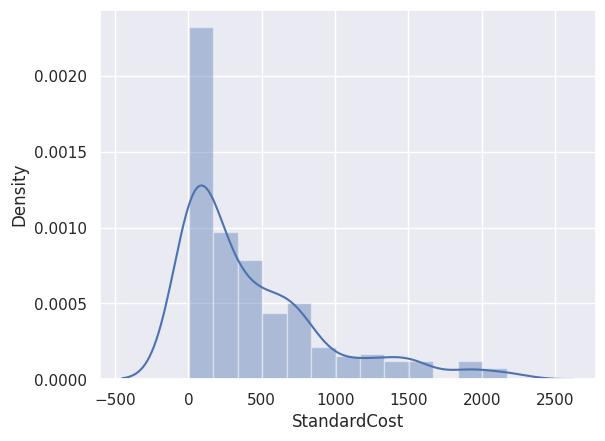

In [51]:
# Distribution plot to identify which Technique to use
sns.distplot(Product_data['StandardCost'])

In [52]:
# Fillna method using median
col=Product_data['StandardCost']
col=col.fillna(col.median(),inplace=True)

In [53]:
Product_data.isnull().sum()


ProductKey              0
ProductName             0
SubCategory           209
Category              209
StandardCost            0
Color                 254
ListPrice             211
DaysToManufacture       0
ProductLine           226
ModelName             209
Photo                   0
ProductDescription    210
StartDate               0
dtype: int64

<Axes: xlabel='ListPrice', ylabel='Density'>

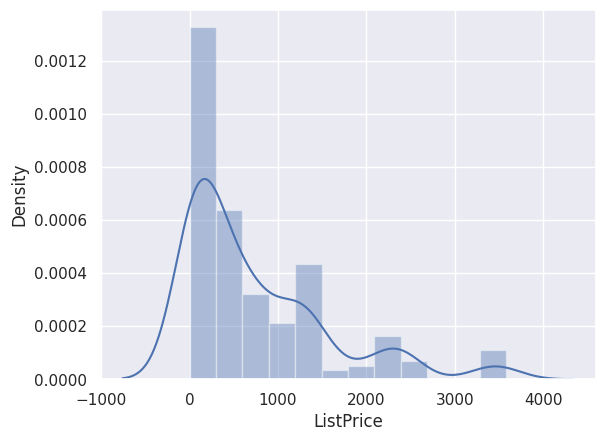

In [54]:
# Distribution plot to identify which technique to use
sns.distplot(Product_data['ListPrice'])

In [55]:
# fill the value using Median
col=Product_data['ListPrice']
col=col.fillna(col.median(),inplace=True)

In [56]:
Product_data.isnull().sum()


ProductKey              0
ProductName             0
SubCategory           209
Category              209
StandardCost            0
Color                 254
ListPrice               0
DaysToManufacture       0
ProductLine           226
ModelName             209
Photo                   0
ProductDescription    210
StartDate               0
dtype: int64

In [57]:
# fill categorical missing data using Mode
col=Product_data['SubCategory']
col=col.fillna(col.mode()[0],inplace=True)

col=Product_data['Category']
col=col.fillna(col.mode()[0],inplace=True)

col=Product_data['Color']
col=col.fillna(col.mode()[0],inplace=True)

col=Product_data['ProductLine']
col=col.fillna(col.mode()[0],inplace=True)

col=Product_data['ModelName']
col=col.fillna(col.mode()[0],inplace=True)

col=Product_data['ProductDescription']
col=col.fillna(col.mode()[0],inplace=True)

In [58]:
Product_data.isnull().sum()


ProductKey            0
ProductName           0
SubCategory           0
Category              0
StandardCost          0
Color                 0
ListPrice             0
DaysToManufacture     0
ProductLine           0
ModelName             0
Photo                 0
ProductDescription    0
StartDate             0
dtype: int64

# **Merging Data**

In [59]:
temp_data = pd.merge(Sales_data, Product_data, on='ProductKey', how='inner')
df = pd.merge(temp_data, Customers_data, on='CustomerKey', how='inner')
df = pd.merge(df, Territory_data, on='SalesTerritoryKey', how='inner')

In [60]:
df.shape

(58189, 47)

In [61]:
# Check column names
print("Sales_data columns:", Sales_data.columns)
# print("Product_data columns:", Product_data.columns)
# print("Territory_data columns:", Territory_data.columns)
# print("Customers_data columns:", Customers_data.columns)

# Check data types
#print("Sales_data 'ProductKey' dtype:", Sales_data['ProductKey'].dtype)
#print("Product_data 'ProductKey' dtype:", Product_data['ProductKey'].dtype)


Sales_data columns: Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'StandardCost', 'List Price'],
      dtype='object')


# **Accessing Data**

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  StandardCost_x  

In [13]:
#df.drop(['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 22','StandardCost_y','diif std cost','diff list price'], axis=1, inplace=True)

In [63]:
df.shape

(58189, 47)

In [67]:
rename=df.rename(columns={'StandardCost_x': 'Standardcost'})
rename.head(1)

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance,Region,Country,Group,RegionImage
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.135,...,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...


In [69]:
df.columns

Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'StandardCost_x', 'List Price', 'ProductName', 'SubCategory',
       'Category', 'StandardCost_y', 'Color', 'ListPrice', 'DaysToManufacture',
       'ProductLine', 'ModelName', 'Photo', 'ProductDescription', 'StartDate',
       'FirstName', 'LastName', 'FullName', 'BirthDate', 'MaritalStatus',
       'Gender', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome',
       'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned',
       'AddressLine1', 'DateFirstPurchase', 'CommuteDistance', 'Region',
       'Country', 'Group', 'RegionImage'],
      dtype='object')

In [70]:
df.describe().transpose()


,count,mean,min,25%,50%,75%,max,std
ProductKey,58189.0,437.208304,214.0,358.0,479.0,529.0,606.0,118.099746
OrderDate,58189,2016-06-03 03:56:09.605939200,2014-01-01 00:00:00,2016-04-01 00:00:00,2016-07-07 00:00:00,2016-10-10 00:00:00,2016-12-30 00:00:00,NaN
ShipDate,58189,2016-06-10 04:03:24.657237760,2014-01-08 00:00:00,2016-04-08 00:00:00,2016-07-14 00:00:00,2016-10-17 00:00:00,2017-01-07 00:00:00,NaN
CustomerKey,58189.0,18853.00464,11000.0,14012.0,18151.0,23450.0,29483.0,5433.374315
PromotionKey,58189.0,1.043427,1.0,1.0,1.0,1.0,14.0,0.348948
SalesTerritoryKey,58189.0,6.261716,1.0,4.0,7.0,9.0,10.0,2.960248
SalesOrderLineNumber,58189.0,1.887453,1.0,1.0,2.0,2.0,8.0,1.018829
OrderQuantity,58189.0,1.569386,1.0,1.0,1.0,2.0,4.0,1.047532
UnitPrice,58189.0,413.888218,0.5725,4.99,24.49,269.995,3578.27,833.052938
TotalProductCost,58189.0,296.539185,0.8565,3.3623,12.1924,343.6496,2171.2942,560.171436


In [71]:
# checking Empty Values of Budget Data
missing_count_percent=(budget_data.isnull().sum()/budget_data.shape[0])*100
pd.DataFrame(missing_count_percent).round(2)

,0
Category,0.0
Subcategory,0.0
ProductName,0.0
"Jan, 2016",0.0
"Feb, 2016",0.0
"Mar, 2016",0.0
"Apr, 2016",0.0
"May, 2016",0.0
"Jun, 2016",0.0
"Jul, 2016",0.0


In [73]:
# Checking Empty Values
# missing_count_percent=(df.isnull().sum()/df.shape[0])*100
# pd.DataFrame(missing_count_percent).round(2)

In [74]:
# Fillna Method using Mode
# col=df['Color']
# col=df.fillna(col.mode()[0],inplace=True)

In [ ]:
#df.dropna(inplace=True)

# Drop rows with null values in specific columns
#df.dropna(subset=['Color'], inplace=True)
#df.drop('Color',axis=1)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  StandardCost_x  

In [78]:
# Check for duplicate data
#df.duplicated().sum()

In [79]:
# Check for duplicate data for budget data
#budget_data.duplicated().sum()

# **Adding Columns**

In [80]:

#Extracting Year from OrderDate
df['sale_year']=df['OrderDate'].dt.year

# Extracting Month from OrderDate
df['sale_month']=df['OrderDate'].dt.month

# Extracting Day from OrderDate
df['sale_day']=df['OrderDate'].dt.day

#Extracting Dayofweek from OrderDate
df['sale_dayofweek']=df['OrderDate'].dt.dayofweek

#Extracting day_name from OrderDate
df['sale_dayname']=df['OrderDate'].dt.day_name

# Extracting Month Year from OrderDate
df['year_month'] = df['OrderDate'].apply(lambda x:x.strftime('%Y-%m'))

# Calculate Total Invoice Amount
df['total_Invoice_amount'] = df['SalesAmount'] + df['TaxAmt']

# Considering only salesamount and total_sales_amount to calculate profit
df['profit'] = (df['UnitPrice']*df['OrderQuantity']) - df['TotalProductCost']

# Removing extra character from the string
df['ProductName'] = df['ProductName'].str.replace(',','-')

# Calculate Age
df['Age'] = df['OrderDate'].dt.year - df['BirthDate'].dt.year

In [81]:
df.shape

(58189, 56)

In [82]:
df.columns

Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'StandardCost_x', 'List Price', 'ProductName', 'SubCategory',
       'Category', 'StandardCost_y', 'Color', 'ListPrice', 'DaysToManufacture',
       'ProductLine', 'ModelName', 'Photo', 'ProductDescription', 'StartDate',
       'FirstName', 'LastName', 'FullName', 'BirthDate', 'MaritalStatus',
       'Gender', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome',
       'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned',
       'AddressLine1', 'DateFirstPurchase', 'CommuteDistance', 'Region',
       'Country', 'Group', 'RegionImage', 'sale_year', 'sale_month',
       'sale_day', 'sale_dayofweek', 'sale_dayname', 'year_month',
       'total_Invoice_amount', 'profit', 'Age'],
      dtype='object')

In [83]:
df.shape

(58189, 56)

In [84]:
# export this clean Data for visualizing using powerbi or you can use any tools
#df.to_excel('df.xlsx', index=False)


In [85]:
# export budget data
#budget_data.to_excel('budget_data.xlsx',index=False)

# **Exploring data**

### List of product's category

In [86]:
df['Category'].unique().tolist()

['Bikes', 'Accessories', 'Clothing']

### List of product's subcategory

In [87]:
df['SubCategory'].unique().tolist()

['Road Bikes',
 'Mountain Bikes',
 'Bottles and Cages',
 'Gloves',
 'Tires and Tubes',
 'Helmets',
 'Touring Bikes',
 'Jerseys',
 'Cleaners',
 'Caps',
 'Hydration Packs',
 'Socks',
 'Fenders',
 'Vests',
 'Bike Racks',
 'Bike Stands',
 'Shorts']

### Analysing Unit Price

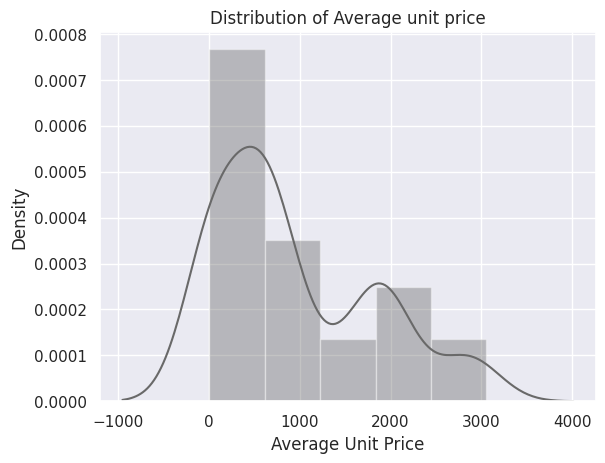

In [88]:
#summarizing the average unit price for each product identified by its 'ProductKey'
Avg_unit_price = df.groupby(['ProductKey'])['UnitPrice'].mean()
ax = sns.distplot(Avg_unit_price, kde=True, hist=True,color='dimgray')
ax.set(title='Distribution of Average unit price', xlabel='Average Unit Price');

*  Maximum of the product unit price is below $1000




### Sales order number distribution

In [89]:
n_orders = df.groupby(['CustomerKey'])['SalesOrderNumber'].nunique()         #represents the number of distinct sales orders made by each customer.
multi_orders_perc = (np.sum(n_orders > 1)/df['CustomerKey'].nunique())*100   #customers have ordered more than once
print(f"{multi_orders_perc:.2f}% of customers ordered more than once.")   #prints the percentage of customers who have ordered more than once,
                                                                          #formatted with two decimal places (%.2f)
                                                                          #and displayed as a percentage.






36.97% of customers ordered more than once.


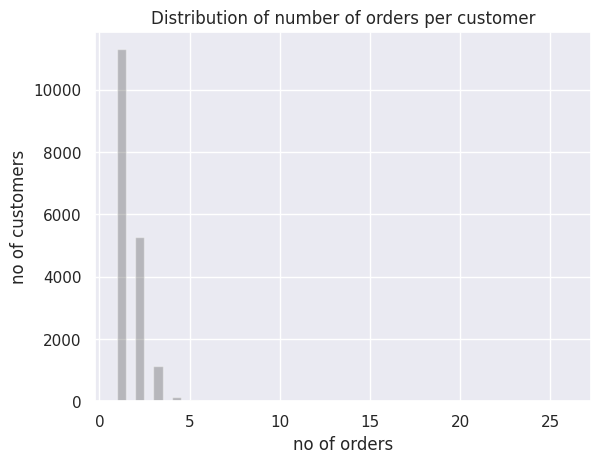

In [90]:
#df.Gender.value_counts()
ax = sns.distplot(n_orders, kde=False, color='dimgray')
ax.set(title='Distribution of number of orders per customer',
       xlabel='no of orders',
       ylabel='no of customers');

### Sales order line number distribution

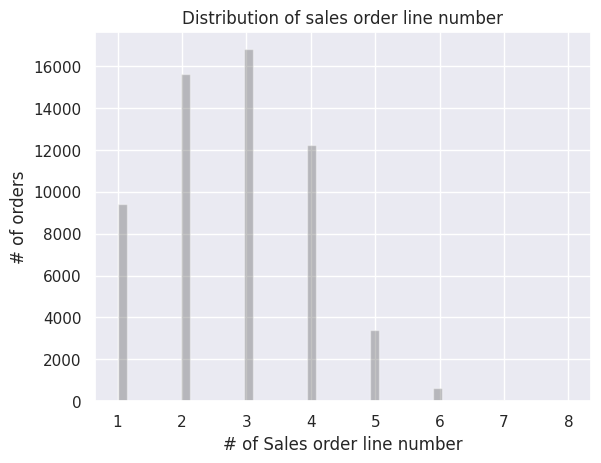

In [91]:
n_salesordernumber = df.groupby(['SalesOrderNumber'])['SalesOrderLineNumber'].transform('max') # transform('max') calculate the maximum value of 'SalesOrderLineNumber'
ax = sns.distplot(n_salesordernumber, kde=False, color='dimgray')
ax.set(title='Distribution of sales order line number',
       xlabel='# of Sales order line number',
       ylabel='# of orders');

- Most of the time **three to two** products are ordered in a single order

### Sales Order Quantity distribution

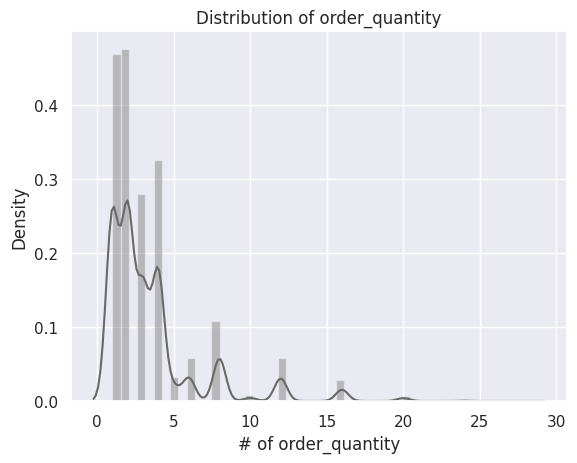

In [92]:
n_order_quantity = df.groupby(['SalesOrderNumber'])['OrderQuantity'].sum()
ax = sns.distplot(n_order_quantity, kde=True, hist=True,color='dimgray')
ax.set(title='Distribution of order_quantity',xlabel='# of order_quantity');

* maximum quantity ordered for a product is below 5






### Age Distribution

In [93]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['agerange'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)

age_distribution = df['agerange'].value_counts().to_frame().reset_index()

age_distribution.columns = ['Age Range','Population count']

fig = px.bar(age_distribution, x='Age Range', y='Population count', color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=True,
    width=500,
    height=500,
    font=dict(size=10))
fig.show()

-
A sizable portion of the clientele is made up of people between the ages of **40** and **59**.

# **Customer**

In [94]:
df.groupby('Gender')['CustomerKey'].count()

Gender
F    28875
M    29314
Name: CustomerKey, dtype: int64

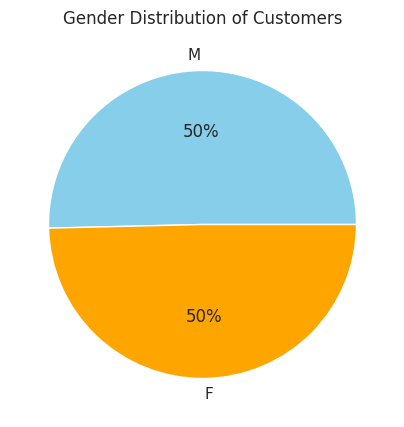

In [95]:
# Gender distribution of customers by ploting pie chart
df['Gender'].value_counts().plot(kind='pie', autopct='%0.0f%%', colors=['skyblue', 'orange'], figsize=(5,5))
# value_count() is used to count of each unique value in the 'Gender' column
#autopct='%0.0f%%' parameter formats the percentage labels on the pie chart. It shows the percentage with no decimal place (%0.0f) followed by the percentage sign (%%).
plt.title('Gender Distribution of Customers')
plt.ylabel('')
plt.show()


- Male and Female customers are equal

In [96]:
m=df.groupby('MaritalStatus')['CustomerKey'].count()
m

MaritalStatus
M    31992
S    26197
Name: CustomerKey, dtype: int64

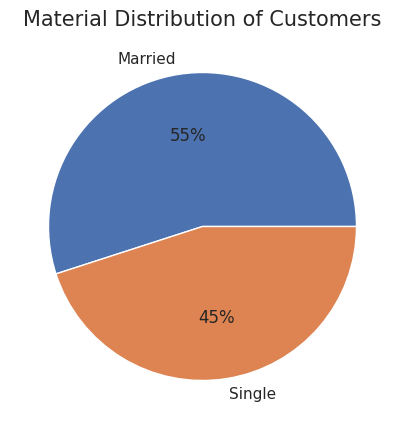

In [97]:
plt.figure(figsize=(5,5))
plt.pie(m, labels=['Married','Single'], autopct='%0.0f%%')
plt.title('Material Distribution of Customers', fontsize=15)
plt.show()

- There are more married customers than single customers. The difference is not sharp but is considerable.

Text(0, 0.5, 'Number of Customers')

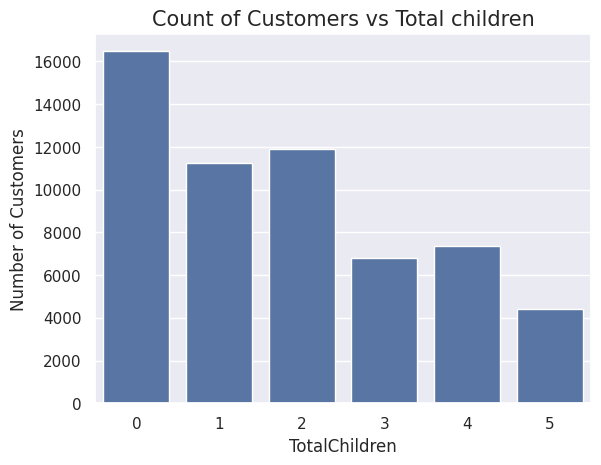

In [98]:
# Evaluting relationship between Total children and no of Customers by ploting bar graph

# first way:-
# sns.set_style('whitegrid')
tcd=sns.countplot(x='TotalChildren',data=df)
plt.title('Count of Customers vs Total children', fontsize=15)
plt.ylabel('Number of Customers')

# second way:-
# customer_children = df.groupby('TotalChildren')['CustomerKey'].nunique()
# plt.figure(figsize=(5,5))
# customer_children.plot(kind='bar', color='skyblue')
# plt.title('Number of Customers by Total Children')
# plt.xlabel('Total Children')
# plt.ylabel('Number of Customers')
# plt.xticks(rotation=0)
# plt.tight_layout()
# plt.show()


- Customers with more than 2 children are very less as compared to the customers with children less than 3.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'Graduate Degree'),
  Text(2, 0, 'Partial College'),
  Text(3, 0, 'Partial High School'),
  Text(4, 0, 'High School')])

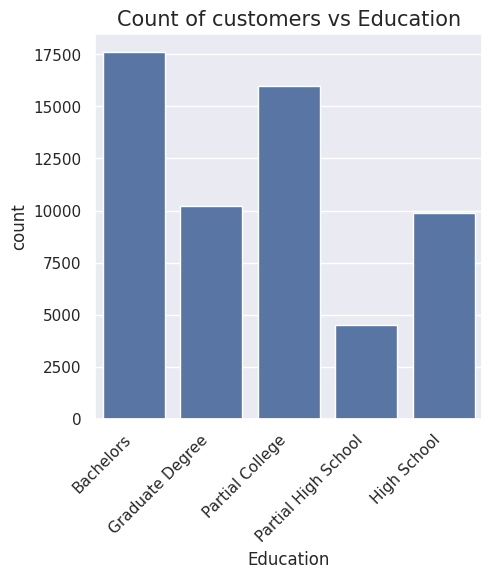

In [99]:
# Evaluating relationship between Education of customers and no of customers by plotting bar graph
plt.figure(figsize=(5,5))
sns.countplot(x='Education',data=df)
plt.title('Count of customers vs Education',fontsize=15)
plt.xticks(rotation=45, ha='right')

- Most of the customers are Bachelors or have Partial collage education

<Figure size 500x500 with 0 Axes>

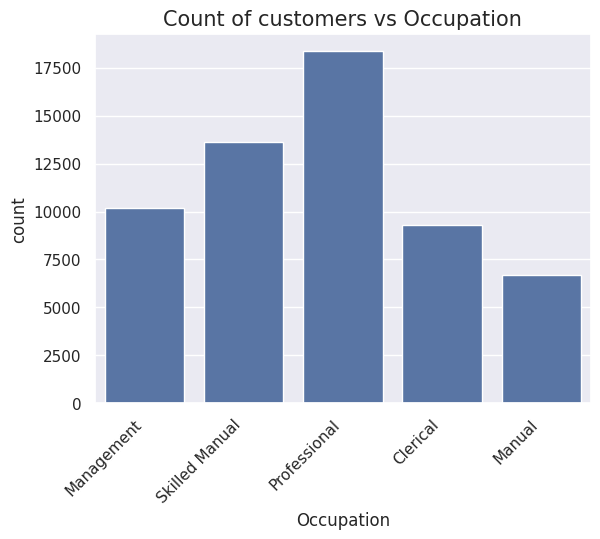

<Figure size 500x500 with 0 Axes>

In [103]:
# Evaluating relationship between Occupation of customers and no of customers by plotting bar graph
sns.countplot(x='Occupation',data=df)
plt.title("Count of customers vs Occupation", fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.figure(figsize=(5,5))


- Most of customers are from professional, skilled manual, management occupation and clerical

<Figure size 500x500 with 0 Axes>

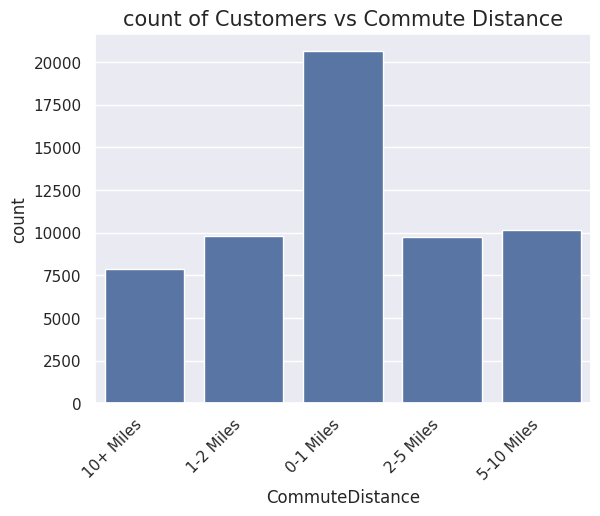

<Figure size 500x500 with 0 Axes>

In [101]:
#count of customers vs commute distance
sns.countplot(x='CommuteDistance',data=df)
plt.title('count of Customers vs Commute Distance',fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.figure(figsize=(5,5))

- Most of the customers are those who has less commute distance i.e. 0-1. Other customers who has commute distance between 1 to 10, has nearly have same customer count.

In [102]:
c=df.groupby('Category')['CustomerKey'].count()
c

Category
Accessories    34319
Bikes          15205
Clothing        8665
Name: CustomerKey, dtype: int64

Text(0.5, 1.0, 'Category Distribution of Customers')

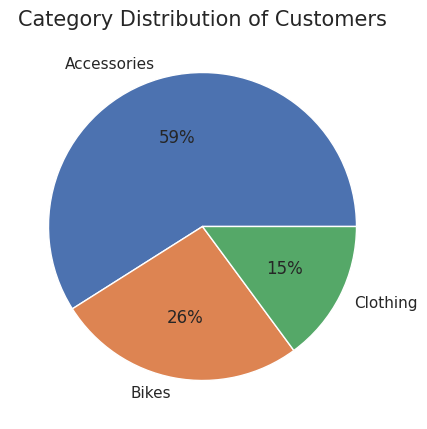

In [104]:
#category distribution of customers by ploting pie chart
plt.figure(figsize=(5,5))
plt.pie(c,labels=['Accessories','Bikes','Clothing'],autopct='%0.0f%%')
plt.title('Category Distribution of Customers',fontsize=15)


- Most of the customers are buying Accessories

<Figure size 500x500 with 0 Axes>

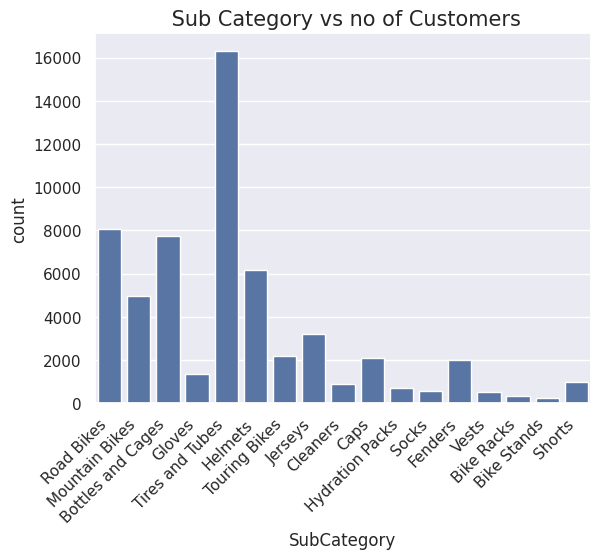

<Figure size 500x500 with 0 Axes>

In [105]:
# Evaluating relationship between Sub Category of Products and no of Customers by ploting bar graph
sns.countplot(x='SubCategory',data=df)
plt.title(' Sub Category vs no of Customers',fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.xticks(rotation=45,ha='right')
plt.figure(figsize=(5,5))

- Most of the customers are buying Accessories like Tires and Tube,Bottles and cages,helmets and Bike category like Road bikes,mountain bikes

<Figure size 500x500 with 0 Axes>

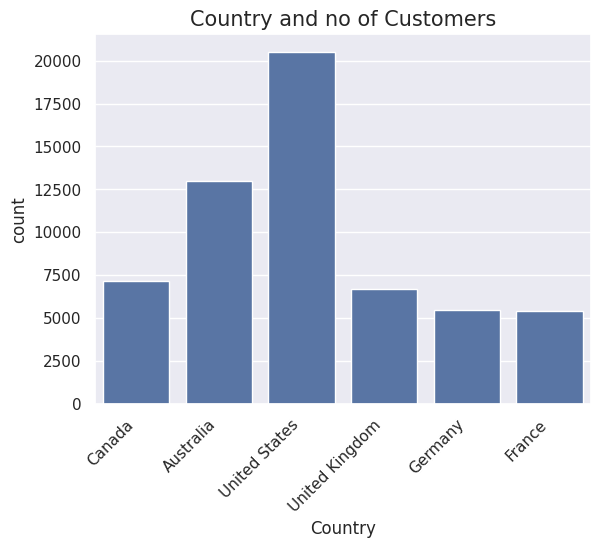

<Figure size 500x500 with 0 Axes>

In [106]:
# Evaluating relationship between Country and no of customers by ploting bar graph
sns.countplot(x='Country',data=df)
plt.title('Country and no of Customers',fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.xticks(rotation=45,ha='right')
plt.figure(figsize=(5,5))

- Most of the customers are from **United states** and **Australia**

In [107]:
cs=df.groupby('Country')['CustomerKey'].count()
cs

Country
Australia         12972
Canada             7142
France             5382
Germany            5460
United Kingdom     6709
United States     20524
Name: CustomerKey, dtype: int64

Text(0.5, 1.0, ' Country distribution of customers')

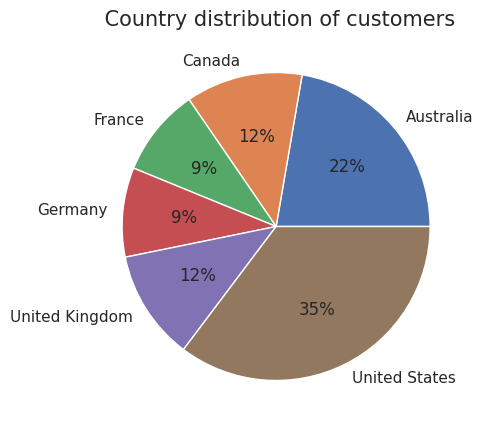

In [108]:
# Country distribution of customers by ploting pie chart
plt.figure(figsize=(5,5))
plt.pie(cs,labels=['Australia','Canada','France','Germany','United Kingdom','United States'],autopct='%0.0f%%')
plt.title(' Country distribution of customers',fontsize=15)


- More than 50% of the customers are from United states and Australia

# **Sales**

(array([0, 1, 2]),
 [Text(0, 0, '2014'), Text(1, 0, '2015'), Text(2, 0, '2016')])

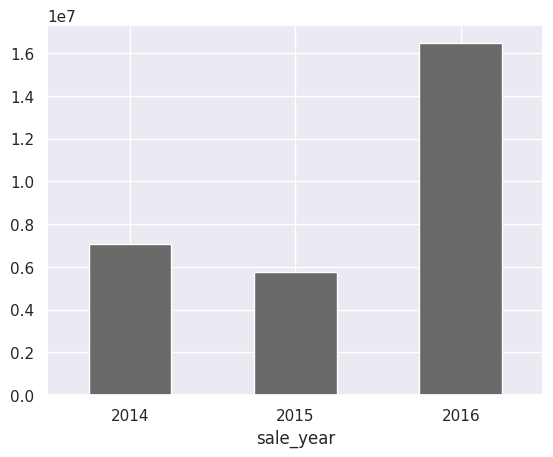

In [109]:
# Year wise sales
df.groupby('sale_year')['SalesAmount'].sum().plot(kind='bar',color='dimgray')
plt.xticks(rotation=0, ha='center')

- Sales boomed in 2016

### Top 5 Selling Product

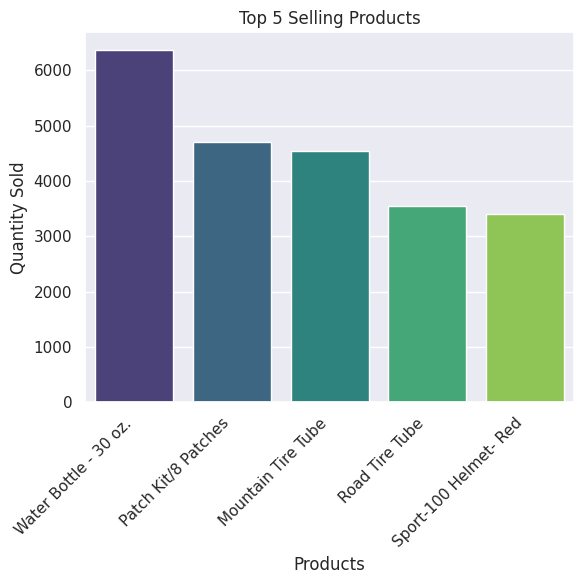

In [110]:
# Top 5 selling Product
top_selling_product = df.groupby(['Category','SubCategory','ProductName'])['OrderQuantity'].sum().nlargest(5).to_frame()
# top_selling_product

top_selling_product.reset_index(inplace=True)
# Create a barplot
plt.figure(figsize=(6, 6))
sns.barplot(x='ProductName', y='OrderQuantity', data=top_selling_product, palette='viridis') #'Viridis' is one of the color palettes available in Seaborn
plt.title('Top 5 Selling Products')
plt.xlabel('Products')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [111]:
# Overall profit based on order year, category and subcategory
cat_subcat_profit = df.groupby(['sale_year','Category', 'SubCategory'])['profit'].sum().to_frame()

#Sorting the results
cat_subcat_profit = cat_subcat_profit.sort_values(['sale_year', 'Category'], ascending=True)
cat_subcat_profit.style.bar(subset=['profit'], color='#D9B300')


- Major Profit is contributed by the Bike Category

In [112]:
# Low profit contributing product
df.groupby(['Category', 'SubCategory','ProductName'])['profit'].sum().nsmallest(10).to_frame()


profit
Category    SubCategory     ProductName                              
Clothing    Socks           Racing Socks- L                 1474.4574
                            Racing Socks- M                 1581.3837
Accessories Cleaners        Bike Wash - Dissolver           4299.8688
            Tires and Tubes Patch Kit/8 Patches             4314.8350
Clothing    Caps            AWC Logo Cap                    4331.8315
Accessories Tires and Tubes Touring Tire Tube               4363.8089
Clothing    Jerseys         Long-Sleeve Logo Jersey- XL     4495.6007
                            Short-Sleeve Classic Jersey- L  4544.8782
                            Long-Sleeve Logo Jersey- S      4610.5777
                            Short-Sleeve Classic Jersey- M  4793.2322

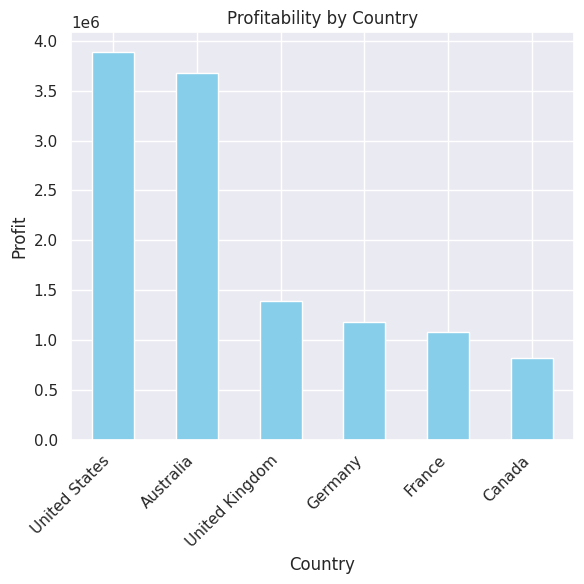

In [113]:
# Profitability by country
df.groupby('Country')['profit'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(6, 6), color='skyblue')
plt.title('Profitability by Country')
plt.xlabel('Country')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- High volume of profit is earned from **United States** and **Australia**

<Axes: title={'center': 'Gender distribution of sales'}, ylabel='SalesAmount'>

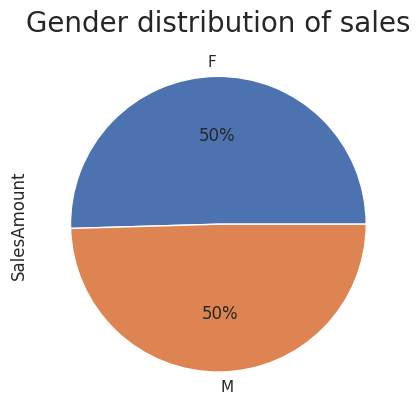

In [114]:
# Gender distribution of sales
salesgender = df.groupby('Gender')['SalesAmount'].sum()
plt.title('Gender distribution of sales',fontsize=20)
salesgender.plot(kind='pie',autopct='%0.0f%%')

- Sales from male and female customers is nearly same

<Axes: title={'center': 'Material status distribution of sales'}, ylabel='SalesAmount'>

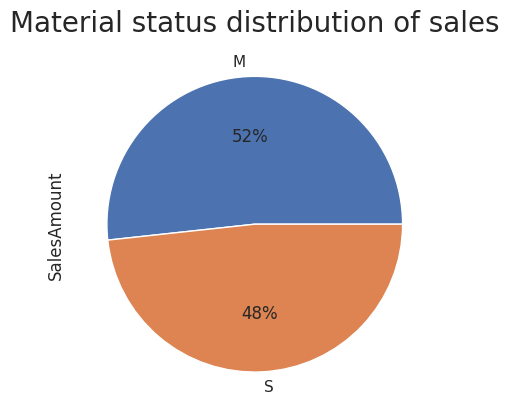

In [115]:
# Material status distribution of sales
salesm = df.groupby('MaritalStatus')['SalesAmount'].sum()
plt.title('Material status distribution of sales',fontsize=20)
salesm.plot(kind='pie',autopct='%0.0f%%')


- sales of married customers is slightly more than single customers

<Axes: title={'center': 'Sales vs Yearly Income'}, xlabel='YearlyIncome', ylabel='Sales Amount'>

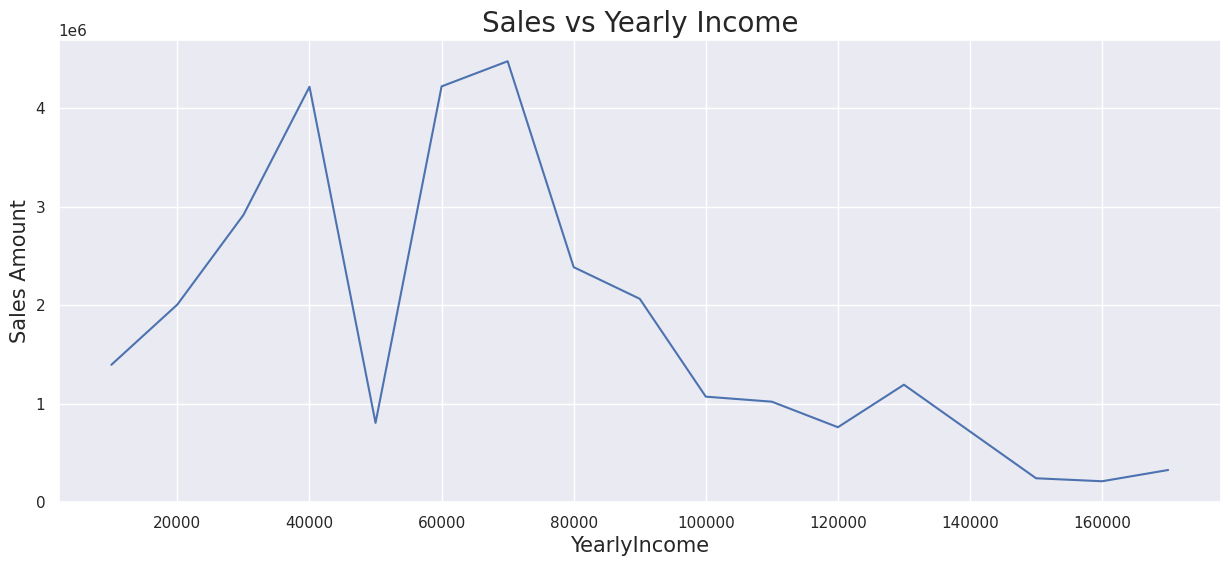

In [116]:
# Sales vs Yearly Income
salesYearlyIncome=df.groupby('YearlyIncome').SalesAmount.sum()
plt.figure(figsize=(15,6))
plt.xlabel('Yearly Income',size=15)
plt.ylabel('Sales Amount',size=15)
plt.title('Sales vs Yearly Income',fontsize=20)
plt.grid()
salesYearlyIncome.plot(kind='line')

- Most of the sales comes from middle class people with Yearly Income from 30,000 to 80,000 Dollers

<Axes: title={'center': 'Sales vs Total Children'}, xlabel='TotalChildren', ylabel='Sales Amount'>

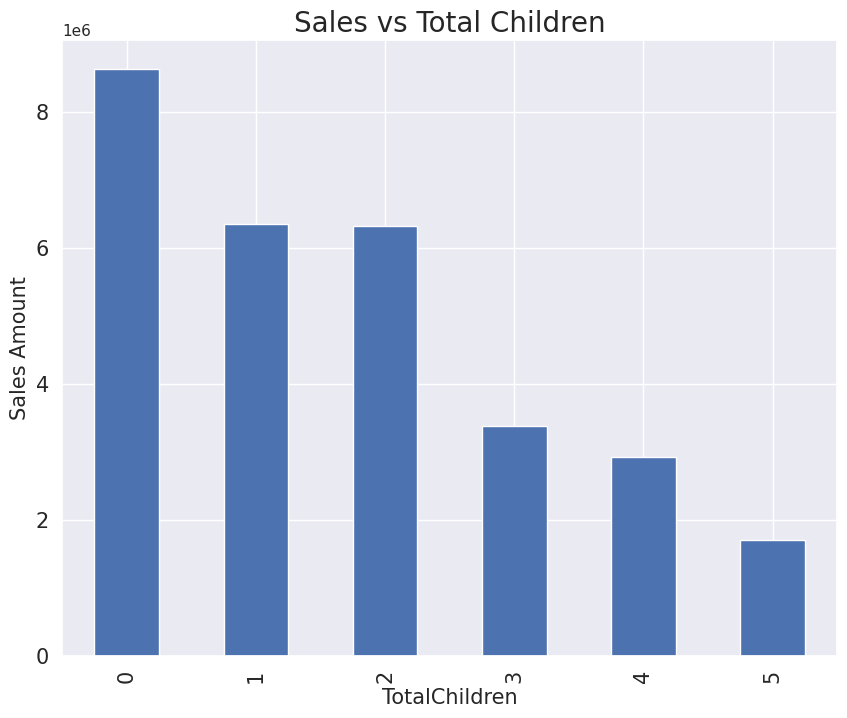

In [117]:
# Evaluating relationship between Total Children and Sales by ploting bar graph
salesTotalChildren=df.groupby('TotalChildren').SalesAmount.sum()
plt.figure(figsize=(10,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total Children',size=15)
plt.ylabel('Sales Amount',size=15)
plt.title('Sales vs Total Children',fontsize=20)
plt.grid()
salesTotalChildren.plot(kind='bar')

- Most of the sales from the customers having 0 to 2 children

<Axes: title={'center': 'Sales vs Education'}, xlabel='Education', ylabel='Sales Amount'>

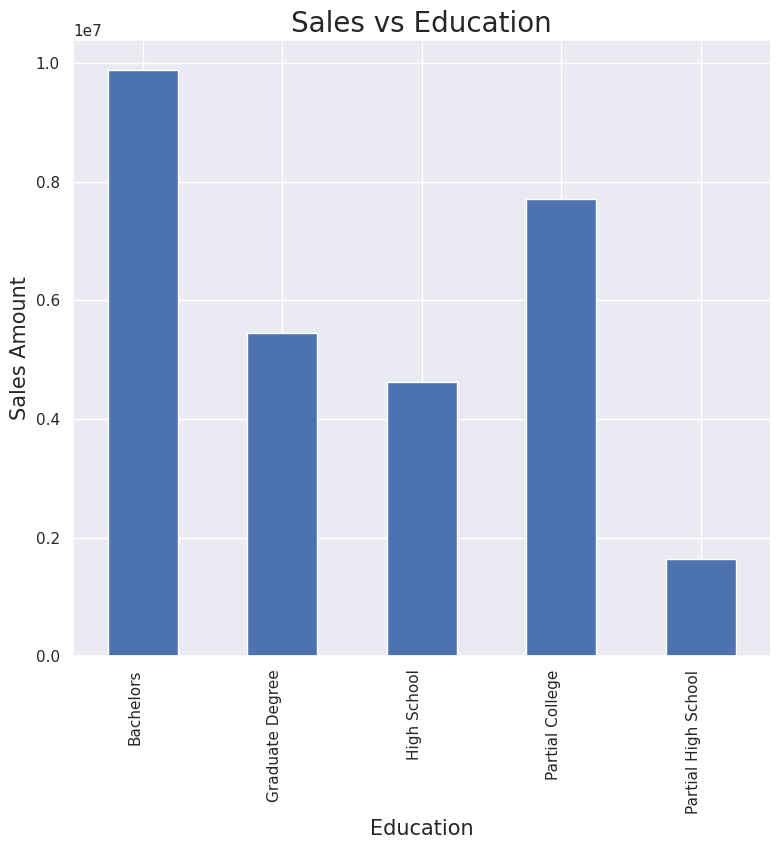

In [118]:
# Sales vs Education
edu=df.groupby('Education').SalesAmount.sum()
plt.figure(figsize=(9,8))
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
plt.xticks(rotation=60,ha='right')
plt.xlabel('Education',size=15)
plt.ylabel('Sales Amount',size=15)
plt.title('Sales vs Education',fontsize=20)
plt.grid()
edu.plot(kind='bar')

- Most of the sales comes from customers with Bachelors and Partial collage education

<Axes: title={'center': 'Sales vs Occupation'}, xlabel='Occupation', ylabel='Sales Amount'>

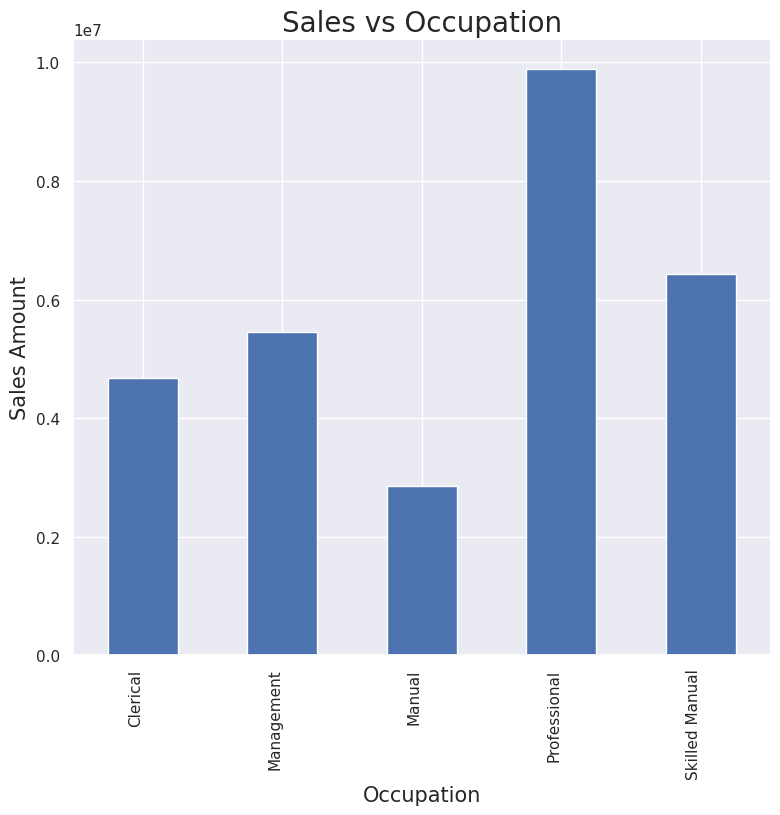

In [119]:
# Occupation and Sales
occ= df.groupby('Occupation').SalesAmount.sum()
plt.figure(figsize=(9,8))
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Occupation',size=15)
plt.ylabel('Sales Amount',size=15)
plt.title('Sales vs Occupation',fontsize=20)
plt.grid()
occ.plot(kind='bar')

- Professionals contribute most of the sales of the company.

<Figure size 500x500 with 0 Axes>

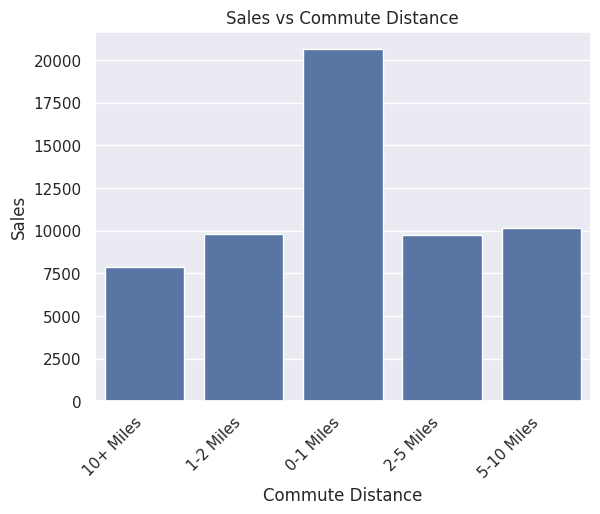

<Figure size 500x500 with 0 Axes>

In [120]:
# Sales vs Commute Distance
sns.countplot(x='CommuteDistance',data=df)
plt.title('Sales vs Commute Distance')
plt.xlabel('Commute Distance')
plt.ylabel('Sales')
plt.xticks(rotation=45,ha='right')
plt.figure(figsize=(5,5))

- Customers with less commute distance contribute to higher sales in company

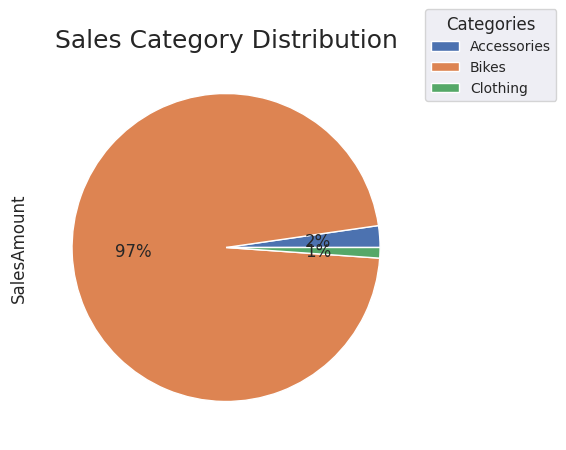

In [121]:
#category distribution of sales by pie chart

sales_category = df.groupby('Category')['SalesAmount'].sum()
plt.figure(figsize=(5,5))
plt.title('Sales Category Distribution', fontsize=18)
pie_chart = sales_category.plot(kind='pie', autopct='%0.0f%%', labels=None)
#plt.axis('equal')
legend_labels = sales_category.index.tolist()
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 1), fontsize='small', title='Categories', title_fontsize='medium')
plt.show()



- 97% of the sales comes from the bikes

<Axes: title={'center': 'Sales vs SubCategory'}, xlabel='SubCategory', ylabel='SalesAmount'>

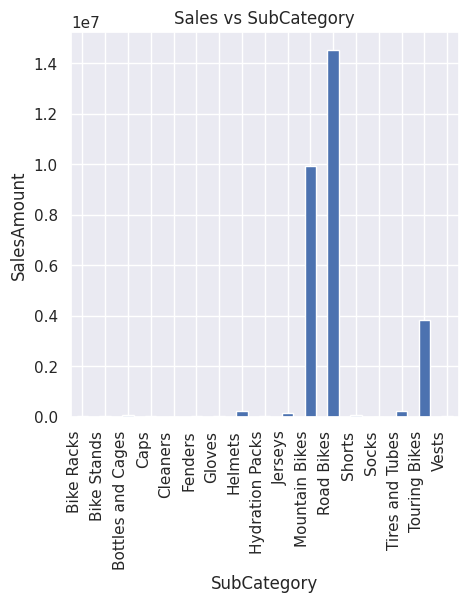

In [122]:
#sub category and sales
salesSub=df.groupby('SubCategory')['SalesAmount'].sum()
plt.figure(figsize=(5,5))
plt.ylabel('SalesAmount')
plt.title('Sales vs SubCategory')
plt.xticks(rotation=45,ha='right')
salesSub.plot(kind='bar')

- Majority of sales comes from Road Bikes and Mountain
Bikes.

<Axes: title={'center': 'Sales Country Distribution'}, ylabel='SalesAmount'>

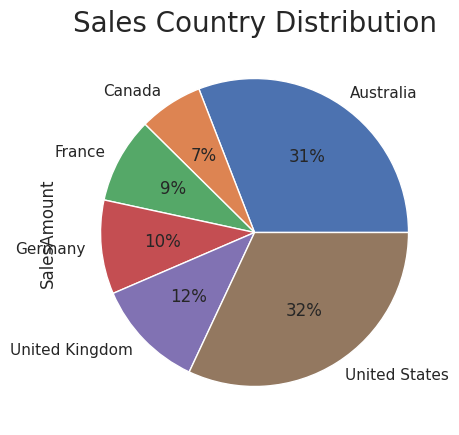

In [123]:
# Sales Country Distribution
salescon=df.groupby('Country')['SalesAmount'].sum()
plt.figure(figsize=(5,5))
plt.title('Sales Country Distribution',fontsize=20)
salescon.plot(kind='pie',autopct='%0.0f%%')


- Most sales comes from **US** and **Australia**

<Axes: title={'center': 'Sales vs Birth Date'}, xlabel='BirthDate', ylabel='Sales Amount'>

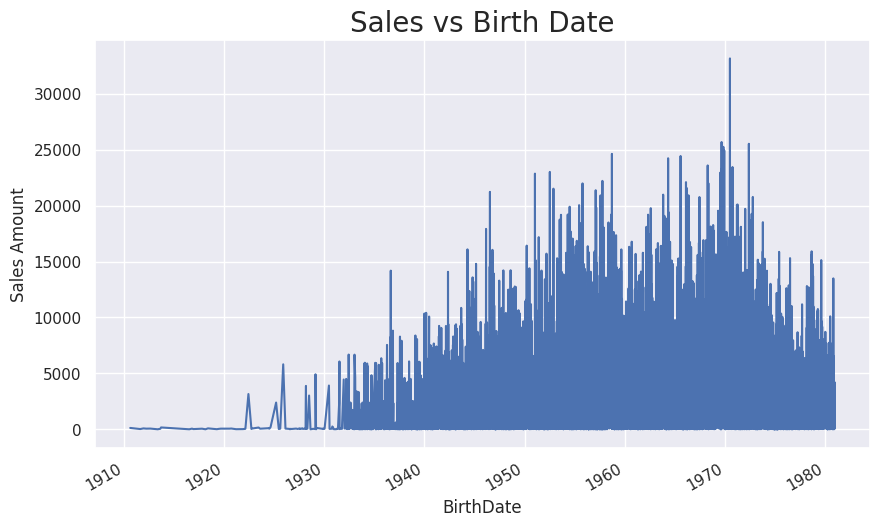

In [124]:
# Birth Date and Sales by line graph
salesBirth=df.groupby('BirthDate')['SalesAmount'].sum()
plt.figure(figsize=(10,6))
plt.ylabel('Sales Amount')
plt.title('Sales vs Birth Date',fontsize=20)
salesBirth.plot(kind='line')

- People with age from 47 to 72 gave most of the sales

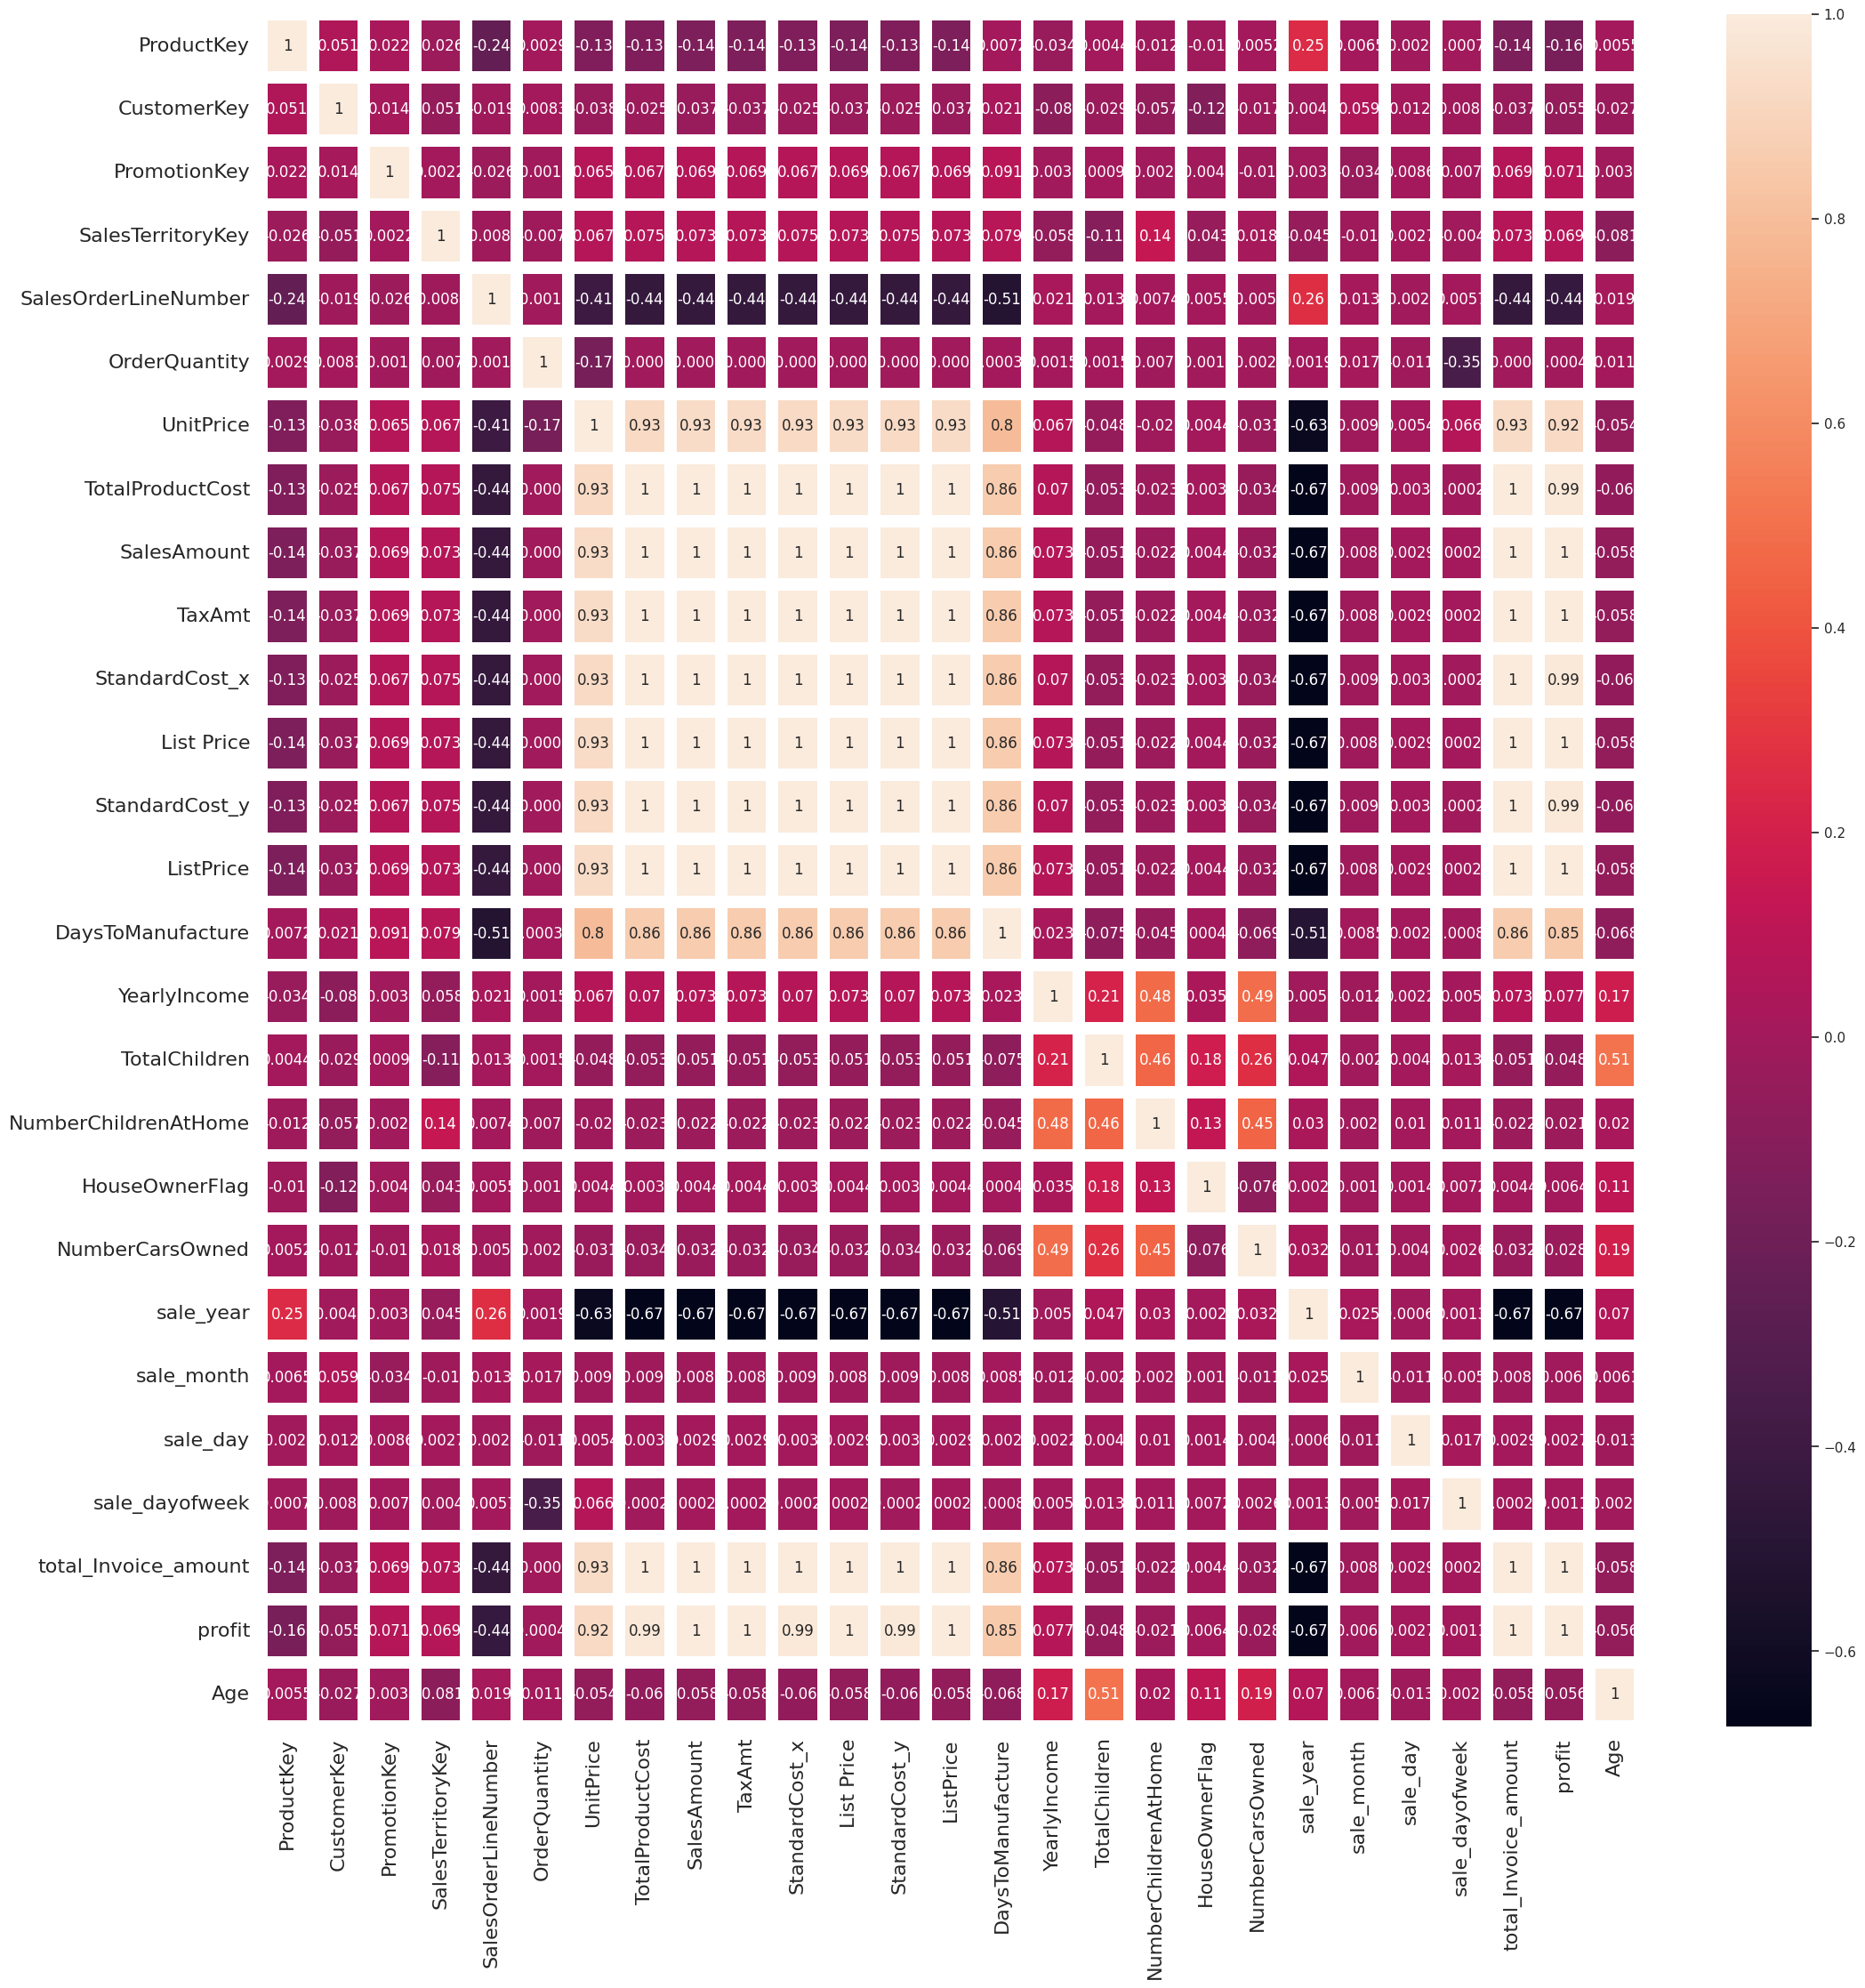

In [125]:
# Heat map to evaluate relationship among the fields
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(25,25))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# Selecting only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, linewidths=10)
plt.show()


